In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset1 = pd.read_csv('/mymldata.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
# Name:S LALIT CHANDRAN
# Register Number:212223240077
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(1,10) # Changed nn.linear to nn.Linear
    self.fc2=nn.Linear(10,12) # Changed nn.linear to nn.Linear
    self.fc3=nn.Linear(12,1) # Changed nn.linear to nn.Linear
    self.relu=nn.ReLU()
    self.history={'loss':[]}
  def forward(self, x):
    x = self. relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x) # No activation here since it's a regression task
    return x

In [ ]:
ai_brain = NeuralNet ()
criterion = nn.MSELoss ()
optimizer = optim.RMSprop (ai_brain. parameters(), lr=0.001)

In [ ]:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad() # Corrected indentation and added . before zero_grad
        loss = criterion(ai_brain(X_train), y_train)
        loss.backward()
        optimizer.step()
        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [ ]:

train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 4107.963379
Epoch [200/2000], Loss: 3577.956055
Epoch [400/2000], Loss: 2677.347168
Epoch [600/2000], Loss: 1594.476074
Epoch [800/2000], Loss: 691.668213
Epoch [1000/2000], Loss: 295.226013
Epoch [1200/2000], Loss: 227.298874
Epoch [1400/2000], Loss: 166.988998
Epoch [1600/2000], Loss: 104.336792
Epoch [1800/2000], Loss: 52.945950


In [ ]:

with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 12.347106


In [ ]:
loss_df = pd.DataFrame(ai_brain.history)

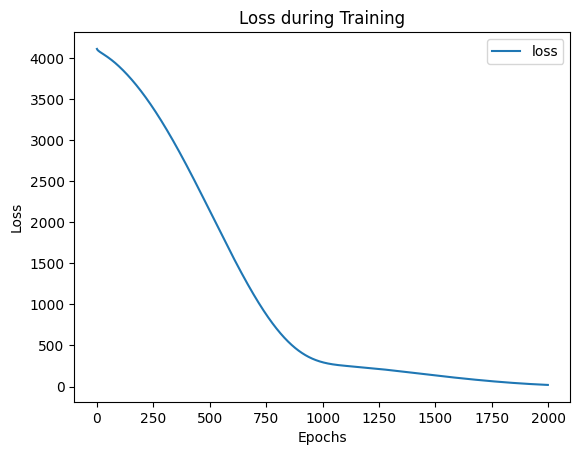

In [ ]:

import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:

X_n1_1 = torch.tensor([[11]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 63.071048736572266


In [ ]:
X_n1_1 = torch.tensor([[5]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 38.23149108886719
